# Income Classification using ML and Python

## Data Importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
start=pd.read_csv('Income Classification.csv')

In [3]:
income_ds=pd.DataFrame(start)

In [4]:
## replacing ? with NaN value
income_ds.replace(to_replace=' ?',value=np.nan,inplace=True)

In [5]:
##displaying first 30 rows of dataset
income_ds.head(30)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [6]:
#finding the shape i.e. no. of rows and columns of dataset
income_ds.shape

(32561, 15)

* There are 32561 rows and 15 attributes in the dataset.

In [7]:
#finding columns of the dataset
income_ds.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [8]:
#info about the dataset
income_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       30725 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      30718 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  31978 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.6+ MB


In [9]:
#descriptive analysis of data
income_ds.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
income_ds.isnull().sum()

age                   0
 workclass         1836
 fnlwgt               0
 education            0
 education-num        0
 marital-status       0
 occupation        1843
 relationship         0
 race                 0
 sex                  0
 capital-gain         0
 capital-loss         0
 hours-per-week       0
 native-country     583
 income               0
dtype: int64

* There are 3 attributes having Null values : workclass, occupation and native-country.

* workclass has 1836 null values,occupation has 1843 null values and native-country has 583 null values.

In [11]:
#Size of the Dataset
income_ds.size

488415

* There are 488415 data items in the Dataset.

In [12]:
#Datatypes of each attribute in the dataset
income_ds.dtypes

age                 int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 income            object
dtype: object

* There are 6 attributes with int64 datatype and 9 attributes with object datatype.

In [13]:
#total non null values of each attribute
income_ds.count()

age                32561
 workclass         30725
 fnlwgt            32561
 education         32561
 education-num     32561
 marital-status    32561
 occupation        30718
 relationship      32561
 race              32561
 sex               32561
 capital-gain      32561
 capital-loss      32561
 hours-per-week    32561
 native-country    31978
 income            32561
dtype: int64

### Removing rows with Null values

In [14]:
income_ds.dropna(inplace=True)

### Removing insignificant columns

In [15]:
# finding percentage of each unique value for each attribute
for c in income_ds.columns:
    print(c)
    print(income_ds[c].value_counts()/income_ds[c].shape[0]*100)

age
36    2.824746
31    2.821431
33    2.775015
34    2.771699
35    2.745176
        ...   
82    0.023208
83    0.016577
88    0.009946
85    0.009946
86    0.003315
Name: age, Length: 72, dtype: float64
 workclass
 Private             73.887673
 Self-emp-not-inc     8.285260
 Local-gov            6.852994
 State-gov            4.240435
 Self-emp-inc         3.560772
 Federal-gov          3.126451
 Without-pay          0.046416
Name:  workclass, dtype: float64
 fnlwgt
203488    0.043101
113364    0.039785
164190    0.039785
123011    0.039785
148995    0.039785
            ...   
34393     0.003315
288341    0.003315
239415    0.003315
118352    0.003315
229376    0.003315
Name:  fnlwgt, Length: 20263, dtype: float64
 education
 HS-grad         32.623831
 Some-college    22.140442
 Bachelors       16.723029
 Masters          5.394205
 Assoc-voc        4.333267
 11th             3.474571
 Assoc-acdm       3.341953
 10th             2.718653
 7th-8th          1.846695
 Prof-school    

* Capital gain and loss each have close to 100 unique values, although majority of their instances have zero values.
* Capital Gain has 91.58% instances with zero values.
* Capital loss has 95.26% instances with zero values.
* This implies that capital gain or loss will not make significant predictors either.


* Education and education number are indicators of the same attribute, education and are fully correlated with direct mapping, it might be useful to remove either during feature selection.

* final weight, which has more than 20,000 unique values .
 This indicates it might not be a significant predictor.

In [16]:
#Replacing associating values 
income_ds[' marital-status'].replace(' Never-married', 'NotMarried',inplace=True)
income_ds[' marital-status'].replace([' Married-AF-spouse'], 'Married',inplace=True)
income_ds[' marital-status'].replace([' Married-civ-spouse'], 'Married',inplace=True)
income_ds[' marital-status'].replace([' Married-spouse-absent'], 'NotMarried',inplace=True)
income_ds[' marital-status'].replace([' Separated'], 'Separated',inplace=True)
income_ds[' marital-status'].replace([' Divorced'], 'Separated',inplace=True)
income_ds[' marital-status'].replace([' Widowed'], 'Widowed',inplace=True)

In [17]:
# Final unique value of marital status
income_ds[' marital-status'].unique()

array(['NotMarried', 'Married', 'Separated', 'Widowed'], dtype=object)

In [18]:
#Unique values of relationship
income_ds[' relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

* There is a significant association between relationship and marital-status.
* so it is better to drop relationship to improve models accuracy.

In [19]:
cols_to_remove=[' fnlwgt',' education',' capital-gain',' capital-loss',' relationship']
income_ds.drop(cols_to_remove,inplace=True,axis=1)

In [20]:
income_ds.shape

(30162, 10)

* Now,there are 30162 rows ,so 2399 rows with missing values have been removed.
* There are 10 attributes now, so 5 attributes have been dropped.

In [21]:
income_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              30162 non-null  int64 
 1    workclass       30162 non-null  object
 2    education-num   30162 non-null  int64 
 3    marital-status  30162 non-null  object
 4    occupation      30162 non-null  object
 5    race            30162 non-null  object
 6    sex             30162 non-null  object
 7    hours-per-week  30162 non-null  int64 
 8    native-country  30162 non-null  object
 9    income          30162 non-null  object
dtypes: int64(3), object(7)
memory usage: 1.7+ MB


In [22]:
income_ds.isnull().sum()

age                0
 workclass         0
 education-num     0
 marital-status    0
 occupation        0
 race              0
 sex               0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

* Now, There are not any null values in any of the attributes.

## Data Formatting

In [23]:
income_ds[["age"," education-num"," hours-per-week"]]=income_ds[["age"," education-num"," hours-per-week"]].apply(pd.to_numeric)

In [24]:
income_ds.head()

,age,workclass,education-num,marital-status,occupation,race,sex,hours-per-week,native-country,income
0,39,State-gov,13,NotMarried,Adm-clerical,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married,Exec-managerial,White,Male,13,United-States,<=50K
2,38,Private,9,Separated,Handlers-cleaners,White,Male,40,United-States,<=50K
3,53,Private,7,Married,Handlers-cleaners,Black,Male,40,United-States,<=50K
4,28,Private,13,Married,Prof-specialty,Black,Female,40,Cuba,<=50K


# Data Visulalization / Exploratory Data Analysis



## Classification of Variables

In [25]:
income_ds.dtypes

age                 int64
 workclass         object
 education-num      int64
 marital-status    object
 occupation        object
 race              object
 sex               object
 hours-per-week     int64
 native-country    object
 income            object
dtype: object

### Quantitative Variables
* age is a Continuous Quantitative variable : Age of an Individual
* fnlwgt is a continuous quantitive variable.
* education-num is a quantitave variable : individual's year of recieving education.
* capital-gain is a quantitave variable.
* capital-loss is a quantitave variable.
* hours-per-week is a quantitave variable : Individual Working hours per week.

### Qualitative Variables
* #### workclass : 
Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* #### education :
Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* #### marital-status:
Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* #### occupation:
Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* #### relationship:
Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* #### race :
 White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* #### sex :
 Female, Male.
* #### native-country:
United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* #### income: TARGET VARIABLE 
>50K, <=50K

# Handle categorical variables with numerically coded values

In [26]:
income_ds['target']=income_ds[' income']
income_ds.drop(" income",inplace=True,axis=1)

In [27]:
def my_target(string):
    if string==' <=50K':
        return 0
    else:
        return 1
income_ds['target']=income_ds.target.map(my_target)

In [28]:
income_ds.target.unique()

array([0, 1], dtype=int64)

In [29]:
# Apply One Hot Encoding
final_attributes=pd.get_dummies(income_ds)
#income_col=income_ds[' income'].map({'<=50K':0,'>50K':1})
encoded_attributes=list(final_attributes.columns)
print("{} total attributes after applying encoding".format(len(encoded_attributes)))
encoded_attributes

77 total attributes after applying encoding


['age',
 ' education-num',
 ' hours-per-week',
 'target',
 ' workclass_ Federal-gov',
 ' workclass_ Local-gov',
 ' workclass_ Private',
 ' workclass_ Self-emp-inc',
 ' workclass_ Self-emp-not-inc',
 ' workclass_ State-gov',
 ' workclass_ Without-pay',
 ' marital-status_Married',
 ' marital-status_NotMarried',
 ' marital-status_Separated',
 ' marital-status_Widowed',
 ' occupation_ Adm-clerical',
 ' occupation_ Armed-Forces',
 ' occupation_ Craft-repair',
 ' occupation_ Exec-managerial',
 ' occupation_ Farming-fishing',
 ' occupation_ Handlers-cleaners',
 ' occupation_ Machine-op-inspct',
 ' occupation_ Other-service',
 ' occupation_ Priv-house-serv',
 ' occupation_ Prof-specialty',
 ' occupation_ Protective-serv',
 ' occupation_ Sales',
 ' occupation_ Tech-support',
 ' occupation_ Transport-moving',
 ' race_ Amer-Indian-Eskimo',
 ' race_ Asian-Pac-Islander',
 ' race_ Black',
 ' race_ Other',
 ' race_ White',
 ' sex_ Female',
 ' sex_ Male',
 ' native-country_ Cambodia',
 ' native-countr

In [30]:

income=final_attributes
income

,age,education-num,hours-per-week,target,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,13,40,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,50,13,13,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,38,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,9,40,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,9,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,9,20,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [31]:
def oneHot(df, df_cols):
    
    df_1 = df.drop(columns = df_cols, axis = 1)
    df_2 = pd.get_dummies(df[df_cols])
    
    return (pd.concat([df_1, df_2], axis=1, join='inner'))

In [32]:
income_df=oneHot(income_ds,income_ds.select_dtypes('object').columns)

In [33]:
income_df.head(10)

,age,education-num,hours-per-week,target,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,13,40,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,50,13,13,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,37,14,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,49,5,16,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,52,9,45,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
8,31,14,50,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,42,13,40,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Perform univariate and bivariate analysis and derive meaningful insights about the dataset

### Univariate Analysis

In [34]:
import seaborn as sns
# Showing count of each value of each attribute
for c in income_ds.columns:
    print(c)
    print(income_ds[c].value_counts())

age
36    852
31    851
33    837
34    836
35    828
     ... 
82      7
83      5
88      3
85      3
86      1
Name: age, Length: 72, dtype: int64
 workclass
 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name:  workclass, dtype: int64
 education-num
9     9840
10    6678
13    5044
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name:  education-num, dtype: int64
 marital-status
Married       14086
NotMarried    10096
Separated      5153
Widowed         827
Name:  marital-status, dtype: int64
 occupation
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 Transport-moving     1572
 Handlers-cleaners    1350
 Farmi

#### Income/ target

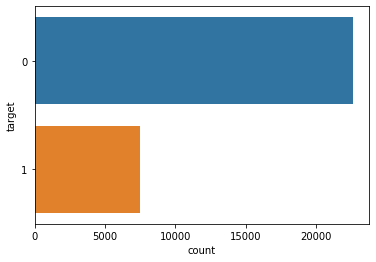

In [35]:
sns.countplot(y="target",data=income_ds)
plt.show()

* Income level <=50K is almost 3 times as of income level >50K.
* So, income <=50K is almost 75%
* income >50K  is almost 25%.
* Data is somewhat skewed.

#### Education Column Column


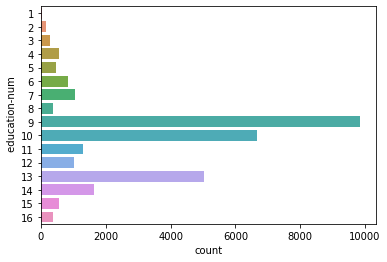

In [36]:
sns.countplot(y=' education-num',data=income_ds)
plt.show()

* Very high number of persons are High-grad(HS-Grad)
* followed by Some-college and Bachelors

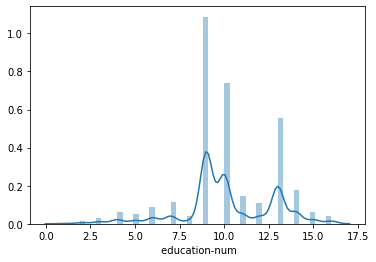

In [37]:
sns.distplot(income_ds[' education-num'])

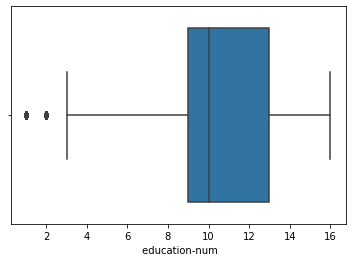

In [38]:
sns.boxplot(income_ds[' education-num'])

#### Marital Status Column

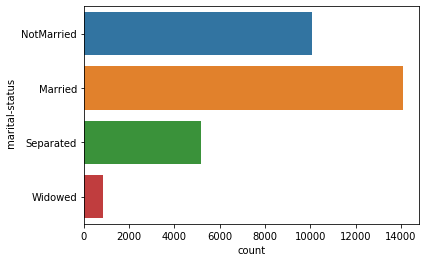

In [39]:
sns.countplot(y=' marital-status',data=income_ds)
plt.show()

* Maximum people are married.
* followed by not-married and seperated.

#### Occupation

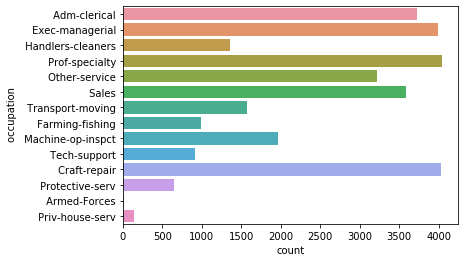

In [40]:
sns.countplot(y=" occupation", data=income_ds)
plt.show()

* Occupation Data is nearly uniform. with maximum number of people in Craft-repair and prof-speciality occupation
* no person is in armed-forces.

#### Workclass

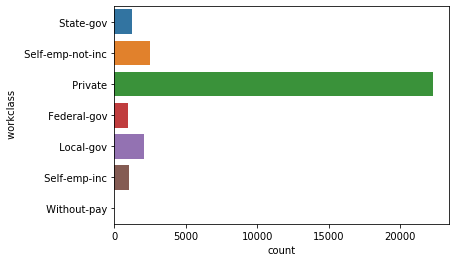

In [41]:
sns.countplot(y=" workclass", data=income_ds)
plt.show()

* Majority of people are working in private sector

#### Age

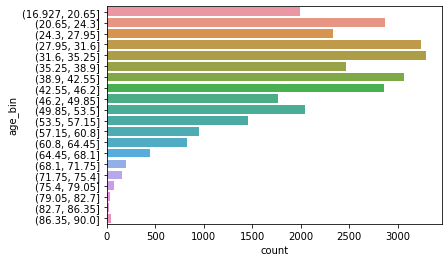

In [42]:
income_ds['age_bin']=pd.cut(income_ds['age'],20)
sns.countplot(y='age_bin',data=income_ds)
plt.show()

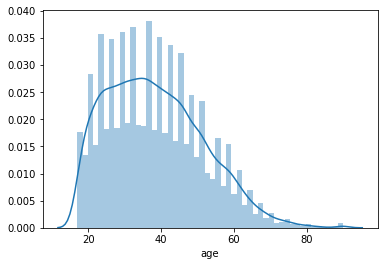

In [43]:
sns.distplot(income_ds['age'])

(array([4869., 5579., 5761., 5925., 3810., 2412., 1278.,  359.,  114.,
          55.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <a list of 10 Patch objects>)

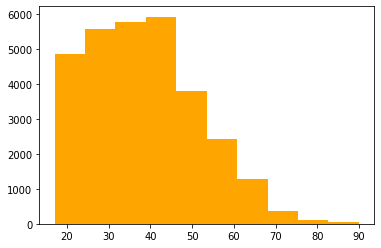

In [44]:
plt.hist(income_ds['age'],color='orange')

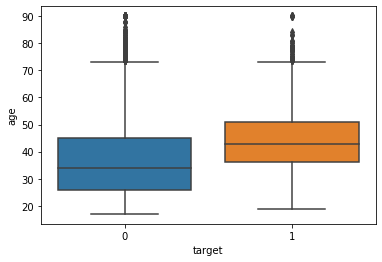

In [45]:
sns.boxplot(y=income_ds['age'],x=income_ds['target'])

#### here all the diamonds are outliers
#### people of higehr age are having more proportion in >50K group

In [46]:
inc=income_ds[['target','age']].groupby(['target'],as_index=False).mean().sort_values(by='age',ascending='False')
inc

,target,age
0,0,36.60806
1,1,43.95911


<BarContainer object of 2 artists>

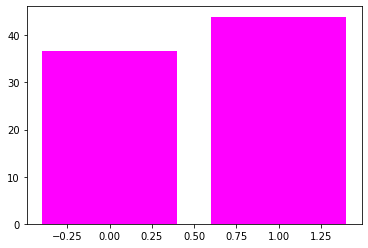

In [47]:
plt.bar(inc['target'],inc['age'],color='magenta')

#### Race and Gender

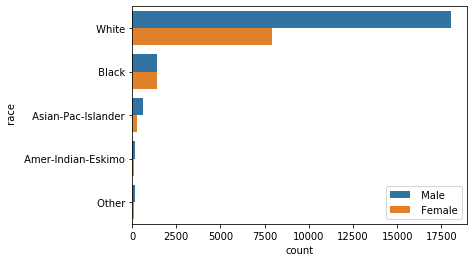

In [48]:
sns.countplot(y=' race',hue=' sex',data=income_ds)
plt.legend(loc='lower right')


* Most people are whites
* Huge gender gap in Whites with male proportion almost twice as that of females.
* Almost no gender gap in Blacks.

#### hours per week

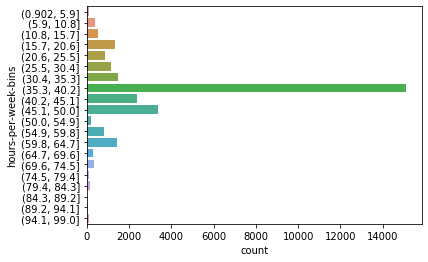

In [49]:
income_ds['hours-per-week-bins']=pd.cut(income_ds[' hours-per-week'],20)
sns.countplot(y='hours-per-week-bins',data=income_ds)
plt.show()

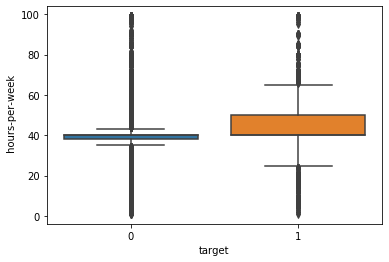

In [50]:
sns.boxplot(y=income_ds[' hours-per-week'],x=income_ds['target'])
plt.show()

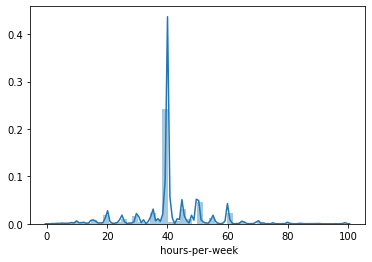

In [51]:
sns.distplot(income_ds[' hours-per-week'])

## Bivariate analysis

####  1. Age vs Income

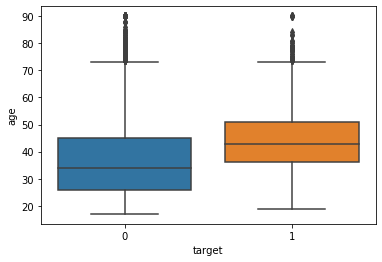

In [52]:
sns.boxplot(x='target',y='age',data=income_ds)
plt.show()

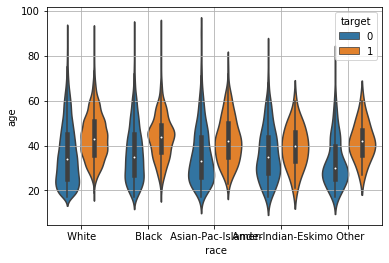

In [53]:
sns.violinplot(x=' race',y='age',hue='target',data=income_ds,gridsize=100)
plt.grid(True)
plt.show()

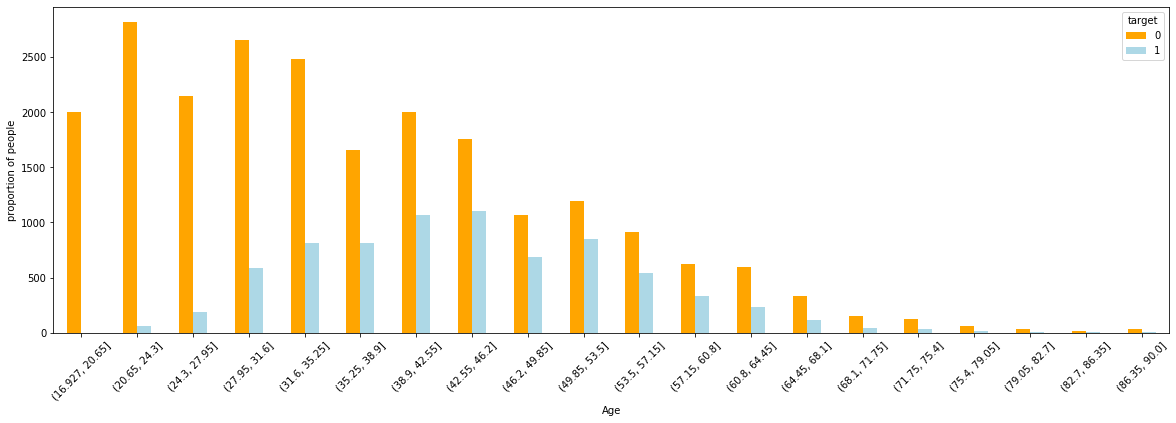

In [54]:
pd.crosstab(income_ds['age_bin'],income_ds['target']).plot(kind='bar',figsize=(20,6),color=['orange','lightblue'])
plt.xticks(rotation=45)
plt.xlabel('Age')
plt.ylabel('proportion of people')
plt.show()

From the graphs above, it is clear that the older peoples have higher proportion in earning >50K.
As the age increses the proportion of people earning <=50K decreases.

####  2. Eduvation-num vs Income

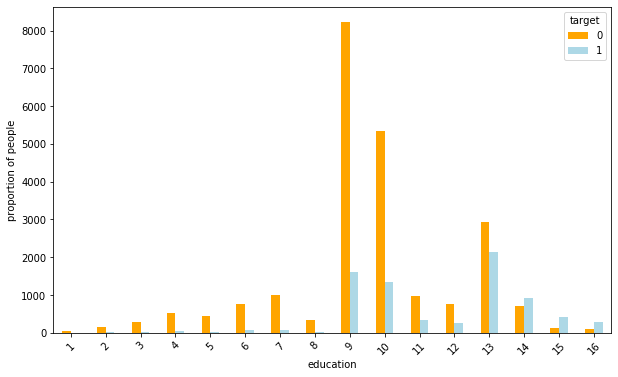

In [55]:
pd.crosstab(income_ds[' education-num'],income_ds['target']).plot(kind='bar',figsize=(10,6),color=['orange','lightblue'])
plt.xticks(rotation=45)
plt.xlabel('education')
plt.ylabel('proportion of people')
plt.show()

* we see from the bar graph above that as the education level increase, the proportion of people who earn more than 50k a year also increase. 
* It is interesting to note that only after a master's degree/education-num=13, the proportion of people earning more than 50k a year, is a majority.

#### 3. Race vs Income

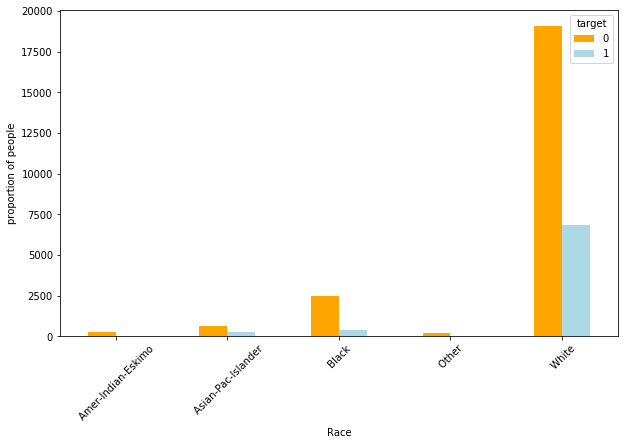

In [56]:
pd.crosstab(income_ds[' race'],income_ds['target']).plot(kind='bar',figsize=(10,6),color=['orange','lightblue'])
plt.xticks(rotation=45)
plt.xlabel('Race')
plt.ylabel('proportion of people')
plt.show()

From the graph, it is clear that whites have larger proportion earning 50K.
all the other races have huge differences between proportion of both income categories

#### Sex vs Income

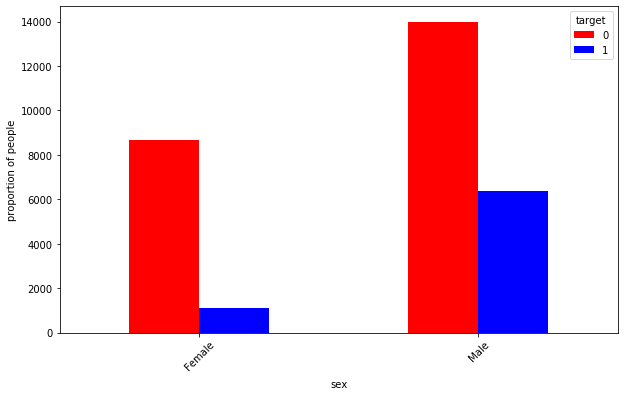

In [57]:
pd.crosstab(income_ds[' sex'],income_ds['target']).plot(kind='bar',figsize=(10,6),color=['red','blue'])
plt.xticks(rotation=45)
plt.xlabel('sex')
plt.ylabel('proportion of people')
plt.show()

* From the graph, at an overall view, there exists a wage gap between females and males.
* Proportion of males earning more than 50k a year is more than double of their female counterparts.

#### Workclass vs Income

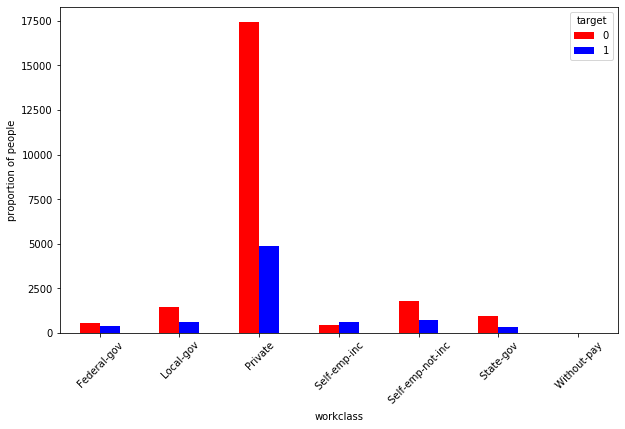

In [58]:
pd.crosstab(income_ds[' workclass'],income_ds['target']).plot(kind='bar',figsize=(10,6),color=['red','blue'])
plt.xticks(rotation=45)
plt.xlabel('workclass')
plt.ylabel('proportion of people')
plt.show()

From the Graph, it is clear that there is a huge difference in the proportion of people earning <=50K and >50K in Private workclass. But in Govt. workclass the difference is not that much.  Self employed persons have higher proportion of >50K.

#### Occupation vs Income

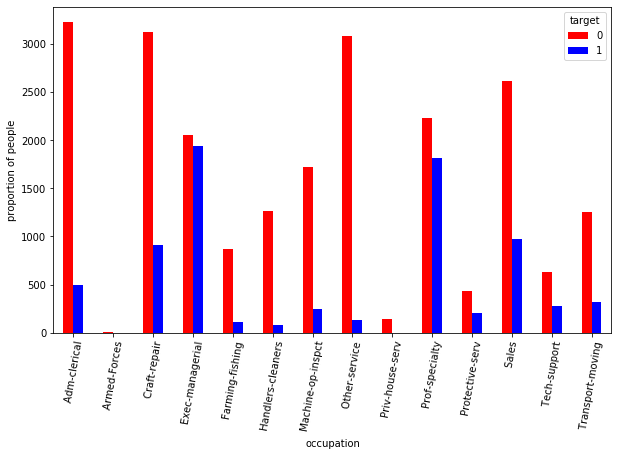

In [59]:
pd.crosstab(income_ds[' occupation'],income_ds['target']).plot(kind='bar',figsize=(10,6),color=['red','blue'])
plt.xticks(rotation=80)
plt.xlabel('occupation')
plt.ylabel('proportion of people')
plt.show()

People in Exec-managerial and Prof-speciality have almost equal proportions of both the income categories viz. <=50K and >50K.
Rest all the occupations have high differences.

#### Native country vs income

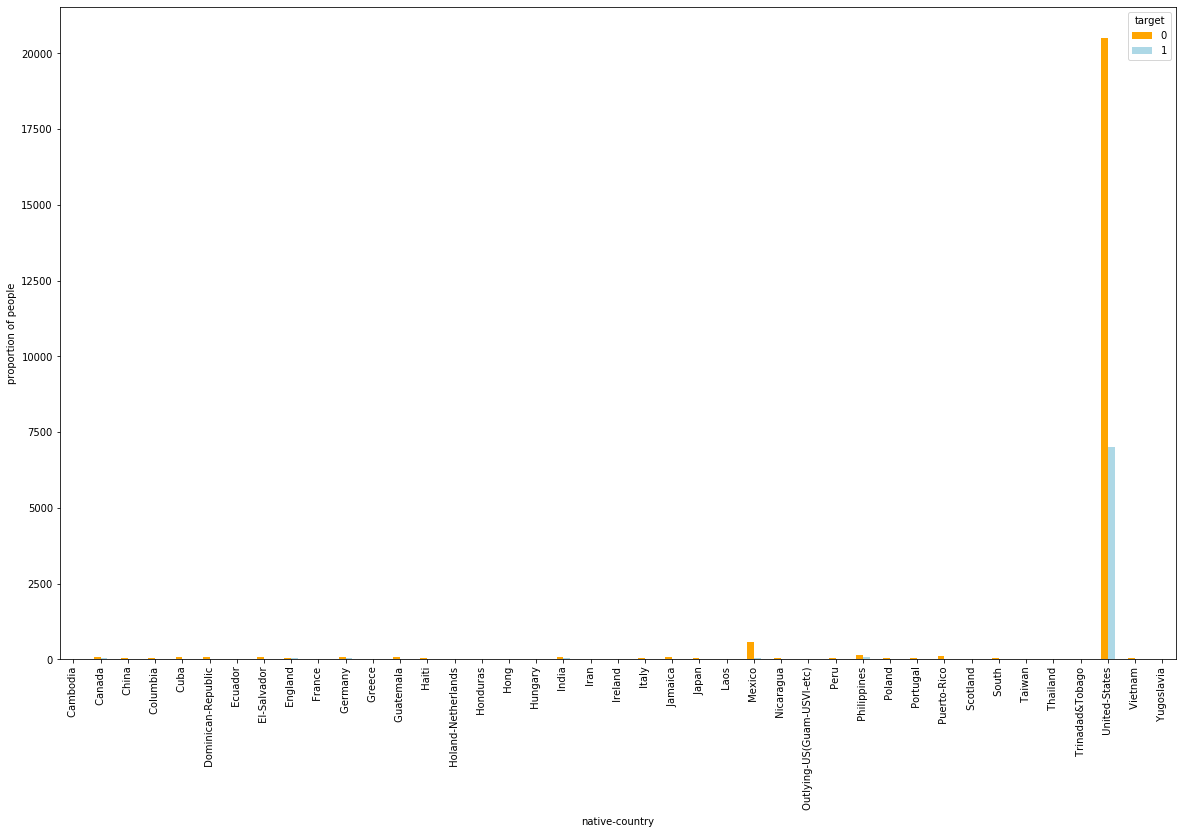

In [60]:
pd.crosstab(income_ds[' native-country'],income_ds['target']).plot(kind='bar',figsize=(20,12),color=['orange','lightblue'])
plt.xticks(rotation=90)
plt.xlabel('native-country')
plt.ylabel('proportion of people')
plt.show()

Text(0, 0.5, 'Proportion of population')

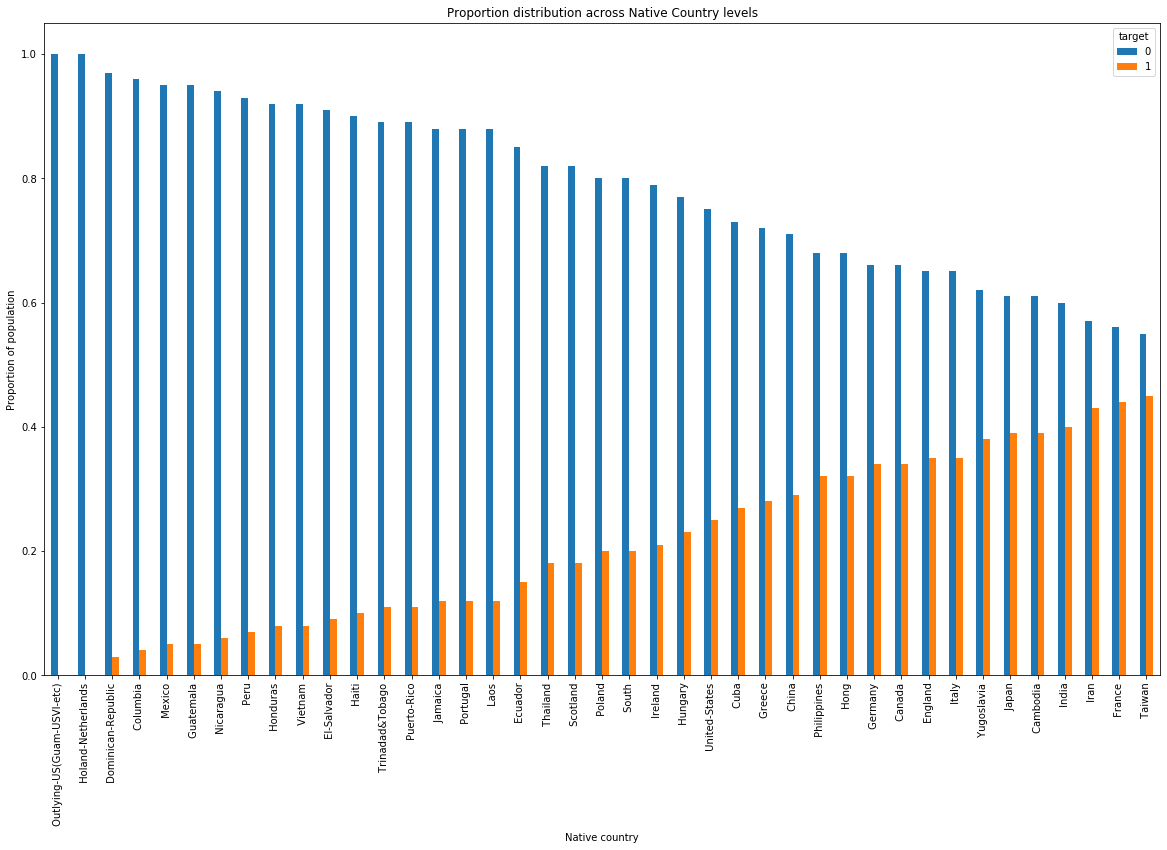

In [61]:
native_country = round(pd.crosstab(income_ds[' native-country'], income_ds['target']).div(pd.crosstab(income_ds[' native-country'], income_ds['target']).apply(sum,1),0),2)
native_country.sort_values(by = 1, inplace = True)
ax = native_country.plot(kind ='bar', title = 'Proportion distribution across Native Country levels', figsize = (20,12))
ax.set_xlabel('Native country')
ax.set_ylabel('Proportion of population')

From the graph, we notice a trend in positioning of the country. South American country are         at the left end of the plot, with low proportion of population that make more than 50k a year. The         United States is located somewhat centrally, and at the right are countries from Europe and Asia,         with higher proportion of population that make more than 50k a year

#### Hours per week vs Income

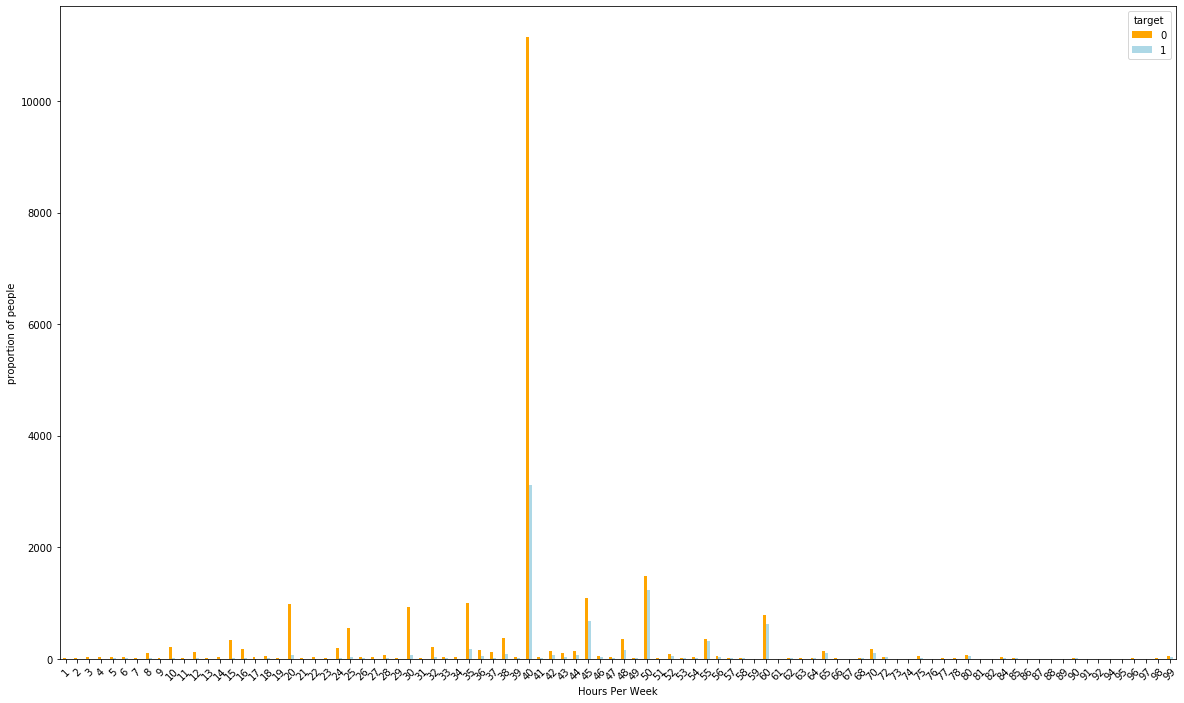

In [62]:
pd.crosstab(income_ds[' hours-per-week'],income_ds['target']).plot(kind='bar',figsize=(20,12),color=['orange','lightblue'])
plt.xticks(rotation=45)
plt.xlabel('Hours Per Week')
plt.ylabel('proportion of people')
plt.show()

Text(0, 0.5, 'Proportion of population')

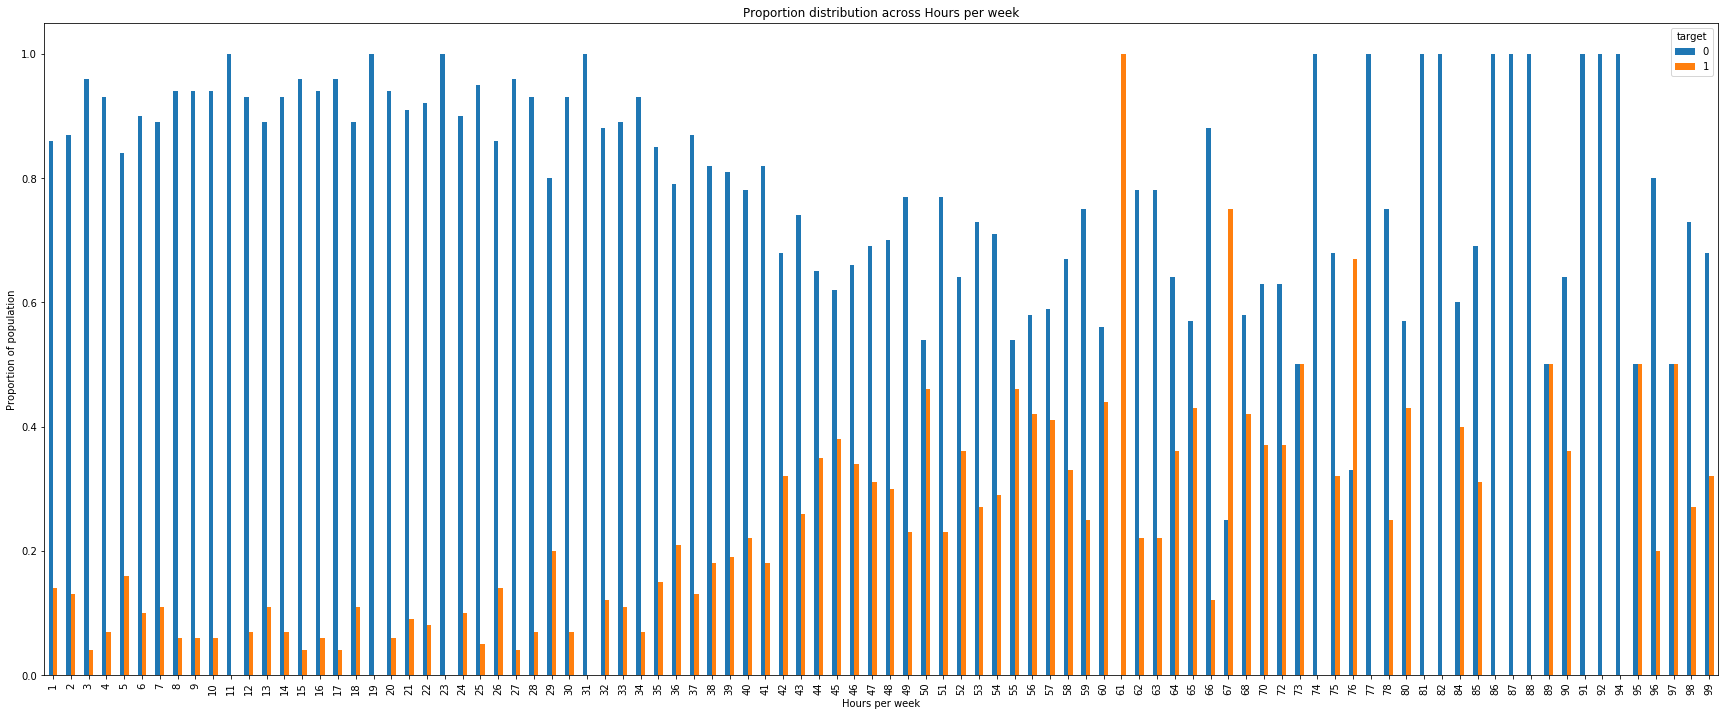

In [63]:

hours_per_week = round(pd.crosstab(income_ds[' hours-per-week'], income_ds.target).div(pd.crosstab(income_ds[' hours-per-week'], income_ds.target).apply(sum,1),0),2)
# hours_per_week.sort_values(by = '>50K', inplace = True)
ax = hours_per_week.plot(kind ='bar', title = 'Proportion distribution across Hours per week', figsize = (30,12))
ax.set_xlabel('Hours per week')
ax.set_ylabel('Proportion of population')

 We would expected to notice a trend that higher the hours worked per week, the higher the proportion         of population making more than 50k a year. However, this was not necessarily true from the graph.         For several hours instance (for example, where hours worked was 77, 79, 81, 82, 87, 88 and so on) no one earned more than 50k a year. ')



#### Marital status vs Income

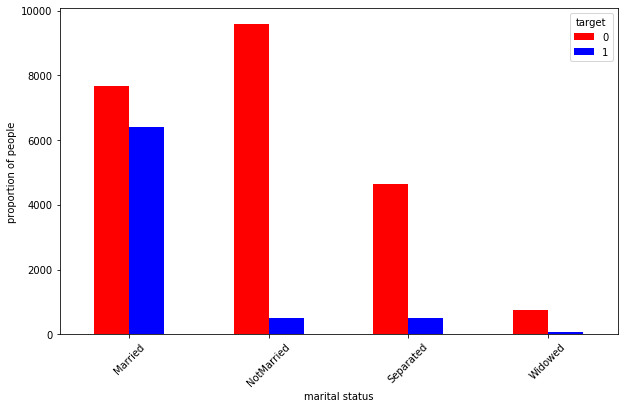

In [64]:
pd.crosstab(income_ds[' marital-status'],income_ds['target']).plot(kind='bar',figsize=(10,6),color=['red','blue'])
plt.xticks(rotation=45)
plt.xlabel('marital status')
plt.ylabel('proportion of people')
plt.show()

Majority of Non married people earn <=50K.

# remove dataset outliers

In [65]:
income_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  30162 non-null  int64   
 1    workclass           30162 non-null  object  
 2    education-num       30162 non-null  int64   
 3    marital-status      30162 non-null  object  
 4    occupation          30162 non-null  object  
 5    race                30162 non-null  object  
 6    sex                 30162 non-null  object  
 7    hours-per-week      30162 non-null  int64   
 8    native-country      30162 non-null  object  
 9   target               30162 non-null  int64   
 10  age_bin              30162 non-null  category
 11  hours-per-week-bins  30162 non-null  category
dtypes: category(2), int64(4), object(6)
memory usage: 2.9+ MB


In [66]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(income_ds['age']))
print(z)

[0.04279571 0.88028814 0.03333996 ... 1.48937355 1.25151078 1.0325595 ]


In [67]:
income_ds=income_ds[z<=3]

In [68]:
income_ds.head()

,age,workclass,education-num,marital-status,occupation,race,sex,hours-per-week,native-country,target,age_bin,hours-per-week-bins
0,39,State-gov,13,NotMarried,Adm-clerical,White,Male,40,United-States,0,"(38.9, 42.55]","(35.3, 40.2]"
1,50,Self-emp-not-inc,13,Married,Exec-managerial,White,Male,13,United-States,0,"(49.85, 53.5]","(10.8, 15.7]"
2,38,Private,9,Separated,Handlers-cleaners,White,Male,40,United-States,0,"(35.25, 38.9]","(35.3, 40.2]"
3,53,Private,7,Married,Handlers-cleaners,Black,Male,40,United-States,0,"(49.85, 53.5]","(35.3, 40.2]"
4,28,Private,13,Married,Prof-specialty,Black,Female,40,Cuba,0,"(27.95, 31.6]","(35.3, 40.2]"


In [69]:
income_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30042 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  30042 non-null  int64   
 1    workclass           30042 non-null  object  
 2    education-num       30042 non-null  int64   
 3    marital-status      30042 non-null  object  
 4    occupation          30042 non-null  object  
 5    race                30042 non-null  object  
 6    sex                 30042 non-null  object  
 7    hours-per-week      30042 non-null  int64   
 8    native-country      30042 non-null  object  
 9   target               30042 non-null  int64   
 10  age_bin              30042 non-null  category
 11  hours-per-week-bins  30042 non-null  category
dtypes: category(2), int64(4), object(6)
memory usage: 1.9+ MB


In [70]:
z = np.abs(stats.zscore(income_ds[' education-num']))
income_ds=income_ds[z<=3]
income_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29849 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  29849 non-null  int64   
 1    workclass           29849 non-null  object  
 2    education-num       29849 non-null  int64   
 3    marital-status      29849 non-null  object  
 4    occupation          29849 non-null  object  
 5    race                29849 non-null  object  
 6    sex                 29849 non-null  object  
 7    hours-per-week      29849 non-null  int64   
 8    native-country      29849 non-null  object  
 9   target               29849 non-null  int64   
 10  age_bin              29849 non-null  category
 11  hours-per-week-bins  29849 non-null  category
dtypes: category(2), int64(4), object(6)
memory usage: 1.9+ MB


In [71]:
z = np.abs(stats.zscore(income_ds[' hours-per-week']))
income_ds=income_ds[z<=3]
income_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29421 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  29421 non-null  int64   
 1    workclass           29421 non-null  object  
 2    education-num       29421 non-null  int64   
 3    marital-status      29421 non-null  object  
 4    occupation          29421 non-null  object  
 5    race                29421 non-null  object  
 6    sex                 29421 non-null  object  
 7    hours-per-week      29421 non-null  int64   
 8    native-country      29421 non-null  object  
 9   target               29421 non-null  int64   
 10  age_bin              29421 non-null  category
 11  hours-per-week-bins  29421 non-null  category
dtypes: category(2), int64(4), object(6)
memory usage: 1.9+ MB


## Correletion matrix

In [72]:
income_ds.corr()

,age,education-num,hours-per-week,target
age,1.000000,0.058012,0.129084,0.255111
education-num,0.058012,1.000000,0.165749,0.338077
hours-per-week,0.129084,0.165749,1.000000,0.244162
target,0.255111,0.338077,0.244162,1.000000


#### We see that none of the columns are highly correlated..

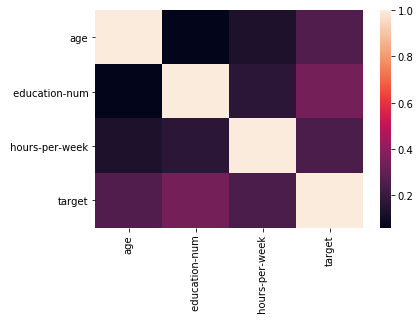

In [73]:
sns.heatmap(income_ds.corr())

In [74]:
#Income_ds dataset has been copied into dset and further dset has been one hot encoded to form a new dataset.
dset=income_ds
dataset=oneHot(dset,dset.select_dtypes('object').columns)

In [156]:
temp_ds=dset
temp_ds

,age,workclass,education-num,marital-status,occupation,race,sex,hours-per-week,native-country,target
0,39,State-gov,13,NotMarried,Adm-clerical,White,Male,40,United-States,0
1,50,Self-emp-not-inc,13,Married,Exec-managerial,White,Male,13,United-States,0
2,38,Private,9,Separated,Handlers-cleaners,White,Male,40,United-States,0
3,53,Private,7,Married,Handlers-cleaners,Black,Male,40,United-States,0
4,28,Private,13,Married,Prof-specialty,Black,Female,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married,Tech-support,White,Female,38,United-States,0
32557,40,Private,9,Married,Machine-op-inspct,White,Male,40,United-States,1
32558,58,Private,9,Widowed,Adm-clerical,White,Female,40,United-States,0
32559,22,Private,9,NotMarried,Adm-clerical,White,Male,20,United-States,0


In [75]:
dataset.head()

,age,education-num,hours-per-week,target,age_bin,hours-per-week-bins,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,13,40,0,"(38.9, 42.55]","(35.3, 40.2]",0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,13,0,"(49.85, 53.5]","(10.8, 15.7]",0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,40,0,"(35.25, 38.9]","(35.3, 40.2]",0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,40,0,"(49.85, 53.5]","(35.3, 40.2]",0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,40,0,"(27.95, 31.6]","(35.3, 40.2]",0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
temp_ds.drop(['target'],inplace=True,axis=1)
print(temp_ds)

       age          workclass   education-num  marital-status  \
0       39          State-gov              13      NotMarried   
1       50   Self-emp-not-inc              13         Married   
2       38            Private               9       Separated   
3       53            Private               7         Married   
4       28            Private              13         Married   
...    ...                ...             ...             ...   
32556   27            Private              12         Married   
32557   40            Private               9         Married   
32558   58            Private               9         Widowed   
32559   22            Private               9      NotMarried   
32560   52       Self-emp-inc               9         Married   

               occupation    race      sex   hours-per-week  native-country  
0            Adm-clerical   White     Male               40   United-States  
1         Exec-managerial   White     Male               13   U

In [76]:
#Feature Selection
salary_target=dataset.target
dataset.drop(['target'],inplace=True,axis=1)
salary_target

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: target, Length: 29421, dtype: int64

In [87]:
dataset.drop(['age_bin','hours-per-week-bins'],inplace=True,axis=1)

In [88]:
# Train - Test split
train_data, test_data, train_target, test_target = train_test_split(dataset,salary_target, test_size  = 0.25,random_state=1)


In [148]:
dataset.columns

Index(['age', ' education-num', ' hours-per-week', ' workclass_ Federal-gov',
       ' workclass_ Local-gov', ' workclass_ Private',
       ' workclass_ Self-emp-inc', ' workclass_ Self-emp-not-inc',
       ' workclass_ State-gov', ' workclass_ Without-pay',
       ' marital-status_Married', ' marital-status_NotMarried',
       ' marital-status_Separated', ' marital-status_Widowed',
       ' occupation_ Adm-clerical', ' occupation_ Armed-Forces',
       ' occupation_ Craft-repair', ' occupation_ Exec-managerial',
       ' occupation_ Farming-fishing', ' occupation_ Handlers-cleaners',
       ' occupation_ Machine-op-inspct', ' occupation_ Other-service',
       ' occupation_ Priv-house-serv', ' occupation_ Prof-specialty',
       ' occupation_ Protective-serv', ' occupation_ Sales',
       ' occupation_ Tech-support', ' occupation_ Transport-moving',
       ' race_ Amer-Indian-Eskimo', ' race_ Asian-Pac-Islander',
       ' race_ Black', ' race_ Other', ' race_ White', ' sex_ Female',
 

In [90]:
# Normalization
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  

# Fitting only on training data
scaler.fit(train_data)  
train_data = scaler.transform(train_data)  

# Applying same transformation to test data
test_data = scaler.transform(test_data)

In [91]:
print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(22065, 76)
(7356, 76)
(22065,)
(7356,)


# 1) Applying Logistic Regression

In [92]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score

In [93]:
#build model
lr=LogisticRegression(max_iter=2000)
lr.fit(train_data,train_target)

C:\Users\sagrawal\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
pred_target=lr.predict(test_data)

In [95]:
lr_score=accuracy_score(test_target,pred_target)
print(lr_score)

0.8300706905927134


## The Accuracy of Logistic regression model is found to be 83%

In [96]:
def print_heatmap(matrix, score, figsize=(9, 9)):
    plt.figure(figsize=figsize)
    sns.heatmap(matrix, annot=True,)   
    plt.xlabel('Prediction')   
    plt.ylabel('Actual') 
    plt.title("Accuracy Score: {0}".format(score), size=15)


### Confusion Matrix

In [97]:
metrix=metrics.confusion_matrix(test_target,pred_target)
metrix

array([[5091,  425],
       [ 825, 1015]], dtype=int64)

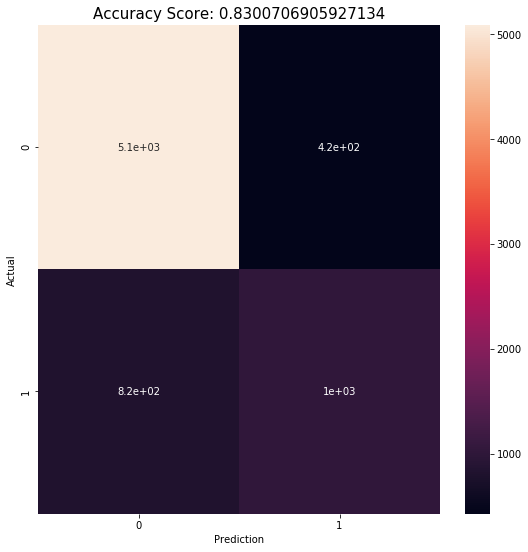

In [98]:
print_heatmap(metrix,lr_score)

# 2) Applying decision tree Classifier

In [99]:
from sklearn.tree import DecisionTreeClassifier

In [100]:
dtc=DecisionTreeClassifier(max_depth=10)
dtc

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [101]:
dtc.fit(X=train_data,y=train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [102]:
pred_dtc_target=dtc.predict(test_data)

In [103]:
dtc_score=accuracy_score(test_target,pred_dtc_target)
dtc_score

0.828847199564981

## The accuracy of decision Tree Classifier is found to be 82.87%

### Confusion Matrix

In [104]:
dtc_matrix=metrics.confusion_matrix(test_target,pred_dtc_target)
dtc_matrix

array([[4956,  560],
       [ 699, 1141]], dtype=int64)

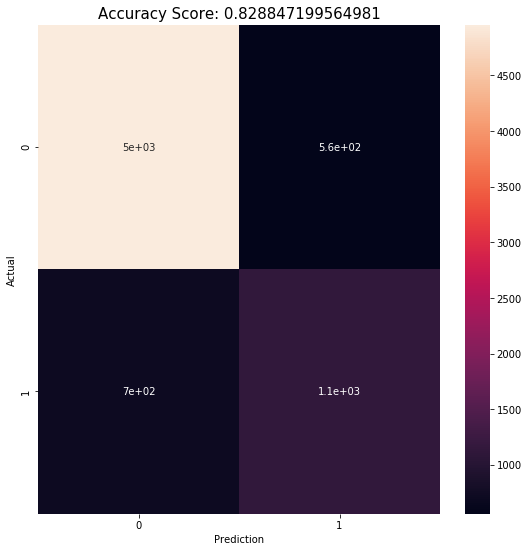

In [105]:
print_heatmap(dtc_matrix,dtc_score)

# 3) Random Forest Classifier 

In [106]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
    # instantiate model
    model=classifier(**kwargs)
    model.fit(X_train,y_train)
    
    # check accuracy and print out the results 
    fit_accuracy=model.score(X_train,y_train)
    test_accuracy=model.score(X_test,y_test)
    print(f"Train Accuracy : {fit_accuracy:0.2%}")
    print(f"Test Accuracy: {test_accuracy:0.2%}")
    return model
    

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
rfc=RandomForestClassifier(random_state=10)

In [109]:
rfc.fit(train_data,train_target)

C:\Users\sagrawal\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [110]:
rfc_pred_target=rfc.predict(test_data)

In [111]:
rfc_score=metrics.accuracy_score(test_target,rfc_pred_target)
rfc_score

0.8170201196302338

rfcm=train_model(train_data,train_target,test_data,test_target,RandomForestClassifier,random_state=10)

## The Accuracy of Random Forest Classifier is found to be 81.70%

### Confusion Matrix

In [112]:
rfc_matrix=metrics.confusion_matrix(test_target,rfc_pred_target)
rfc_matrix

array([[4995,  521],
       [ 825, 1015]], dtype=int64)

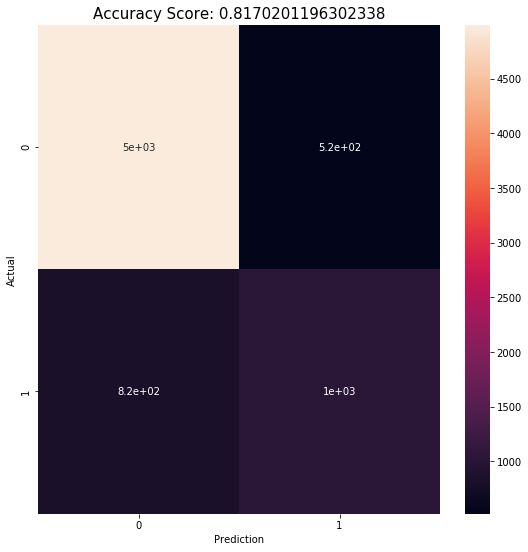

In [113]:
print_heatmap(rfc_matrix,rfc_score)

# 4) KNN Classifier

In [114]:
from sklearn.neighbors import KNeighborsClassifier

In [115]:
knn=train_model(train_data,train_target,test_data,test_target,KNeighborsClassifier,n_neighbors=8)

Train Accuracy : 85.09%
Test Accuracy: 82.19%


In [116]:
knn.fit(train_data,train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [117]:
knn_pred_target=knn.predict(test_data)
print(knn_pred_target)

[0 0 0 ... 1 0 1]


In [118]:
knn_score = round(accuracy_score(test_target,knn_pred_target)*100,2)
print("The accuracy score achieved using KNN is: "+str(knn_score)+" %")

The accuracy score achieved using KNN is: 82.19 %


## The accuracy score achieved using KNN is: 82.19 %


### Confusion Matrix

In [119]:
knn_matrix=metrics.confusion_matrix(test_target,knn_pred_target)
knn_matrix

array([[5103,  413],
       [ 897,  943]], dtype=int64)

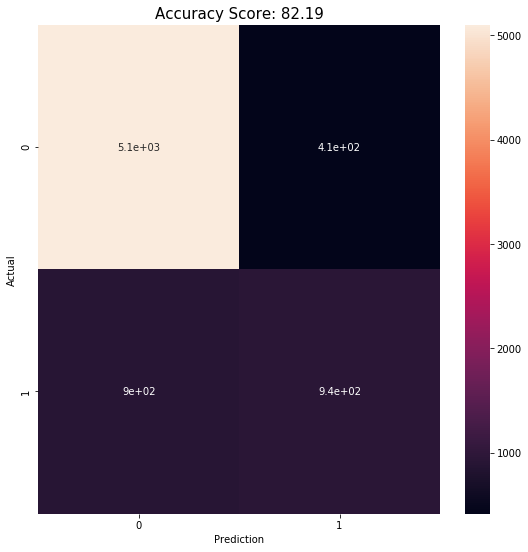

In [120]:
print_heatmap(knn_matrix,knn_score)

# Selecting Best Model

In [121]:
from sklearn.metrics import classification_report

In [122]:
target_names=['<=50K','>50K']
lr_report=classification_report(test_target,pred_target,target_names=target_names)
dtc_report=classification_report(test_target,pred_dtc_target,target_names=target_names)
rfc_report=classification_report(test_target,rfc_pred_target,target_names=target_names)
knn_report=classification_report(test_target,knn_pred_target,target_names=target_names)

In [123]:
print("**********************Classification Report Of Logistic Regression**********************")
print(lr_report)
print("**********************Classification Report Of Decision Tree classifier**********************")
print(dtc_report)
print("**********************Classification Report Of Random Forest Classifier**********************")
print(rfc_report)
print("**********************Classification Report Of KNN Classifier**********************")
print(knn_report)
print("*************************************************************************************")

**********************Classification Report Of Logistic Regression**********************
              precision    recall  f1-score   support

       <=50K       0.86      0.92      0.89      5516
        >50K       0.70      0.55      0.62      1840

    accuracy                           0.83      7356
   macro avg       0.78      0.74      0.75      7356
weighted avg       0.82      0.83      0.82      7356

**********************Classification Report Of Decision Tree classifier**********************
              precision    recall  f1-score   support

       <=50K       0.88      0.90      0.89      5516
        >50K       0.67      0.62      0.64      1840

    accuracy                           0.83      7356
   macro avg       0.77      0.76      0.77      7356
weighted avg       0.82      0.83      0.83      7356

**********************Classification Report Of Random Forest Classifier**********************
              precision    recall  f1-score   support

       <=50K  

## Accuracies of All the Classifiers used

In [124]:
print("LOGISTIC REGRESSION CLASSIFIER : ",lr_score*100,"%")
print("DECISION TREE CLASSIFIER : ",dtc_score*100,"%")
print("RANDOM FOEREST CLASSIFIER : ",rfc_score*100,"%")
print("KNN CLASSIFIER : ",knn_score*100,"%")

LOGISTIC REGRESSION CLASSIFIER :  83.00706905927134 %
DECISION TREE CLASSIFIER :  82.8847199564981 %
RANDOM FOEREST CLASSIFIER :  81.70201196302338 %
KNN CLASSIFIER :  8219.0 %


## Recall, Precision and F1 scores

In [125]:
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [126]:
lr_recall=recall_score(test_target,pred_target)
dtc_recall=recall_score(test_target,pred_dtc_target)
rfc_recall=recall_score(test_target,rfc_pred_target)
knn_recall=recall_score(test_target,knn_pred_target)
print("LOGISTIC REGRESSION CLASSIFIER : ",lr_recall)
print("DECISION TREE CLASSIFIER : ",dtc_recall)
print("RANDOM FOEREST CLASSIFIER : ",rfc_recall)
print("KNN CLASSIFIER : ",knn_recall)
recall=[]
f1=[]
recall.append(lr_recall)
recall.append(dtc_recall)
recall.append(rfc_recall)
recall.append(knn_recall)

LOGISTIC REGRESSION CLASSIFIER :  0.5516304347826086
DECISION TREE CLASSIFIER :  0.6201086956521739
RANDOM FOEREST CLASSIFIER :  0.5516304347826086
KNN CLASSIFIER :  0.5125


In [127]:
lr_prec=precision_score(test_target,pred_target)
dtc_prec=precision_score(test_target,pred_dtc_target)
rfc_prec=precision_score(test_target,rfc_pred_target)
knn_prec=precision_score(test_target,knn_pred_target)
print("LOGISTIC REGRESSION CLASSIFIER : ",lr_prec)
print("DECISION TREE CLASSIFIER : ",dtc_prec)
print("RANDOM FOEREST CLASSIFIER : ",rfc_prec)
print("KNN CLASSIFIER : ",knn_prec)
precision=[]
precision.append(lr_prec)
precision.append(dtc_prec)
precision.append(rfc_prec)
precision.append(knn_prec)

LOGISTIC REGRESSION CLASSIFIER :  0.7048611111111112
DECISION TREE CLASSIFIER :  0.6707818930041153
RANDOM FOEREST CLASSIFIER :  0.6608072916666666
KNN CLASSIFIER :  0.6954277286135693


In [128]:
lr_f1=f1_score(test_target,pred_target)
dtc_f1=f1_score(test_target,pred_dtc_target)
rfc_f1=f1_score(test_target,rfc_pred_target)
knn_f1=f1_score(test_target,knn_pred_target)
print("LOGISTIC REGRESSION CLASSIFIER : ",lr_f1)
print("DECISION TREE CLASSIFIER : ",dtc_f1)
print("RANDOM FOEREST CLASSIFIER : ",rfc_f1)
print("KNN CLASSIFIER : ",knn_f1)
f1=[]
f1.append(lr_f1)
f1.append(dtc_f1)
f1.append(rfc_f1)
f1.append(knn_f1)

LOGISTIC REGRESSION CLASSIFIER :  0.6189024390243902
DECISION TREE CLASSIFIER :  0.6444507201355549
RANDOM FOEREST CLASSIFIER :  0.6013033175355449
KNN CLASSIFIER :  0.5901126408010011




## Visualising Performance of Models

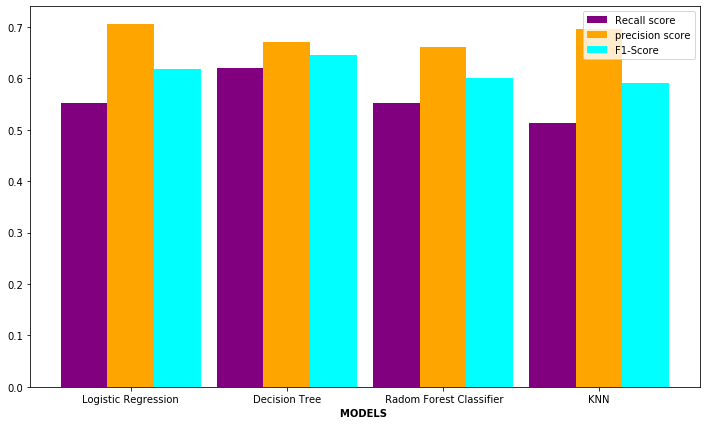

In [129]:
plt.figure(figsize=(12,7)) 
barWidth = 0.30
classifiers = ["Logistic Regression","Decision Tree"," Radom Forest Classifier","KNN"]
r1 = np.arange(len(recall))
r2 = [x + barWidth for x in r1]
r3 = [y + barWidth for y in r2]
plt.bar(r1, recall, color='purple', width=barWidth,  label='Recall score')
plt.bar(r2, precision, color='orange', width=barWidth, label='precision score')
plt.bar(r3, f1, color='cyan', width=barWidth, label='F1-Score')
plt.xlabel('MODELS ', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(recall))], classifiers)
 
plt.legend()
plt.show()

# CONCLUSION

## As the Accuracy of Logistic Regression is better than the other three viz. Decision tree classifier , Random forest Classifier,and KNN Classifier.
## So, for this project, logistic regression is the best classifier

In [286]:
income_ds[' native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

In [265]:
import tkinter as tk
from tkinter import ttk

In [299]:
def take_input():
    inputval=[]
    Age=int(age.get())

    edu=int(eduNum.get())

    hpw=int(hourspweek.get())
  
    inputval.append(Age)
    
    inputval.append(edu)
    inputval.append(hpw)
    inputval.append(workclass.get())
    inputval.append(maritalstatus.get())
    inputval.append(occupation.get())
    inputval.append(race.get())
    inputval.append(gender.get())
    inputval.append(nativecountry.get())
    
    
    
    
 
    print(inputval)
    lst=[]
    lst.append(inputval)
    test_df=pd.DataFrame(lst,columns=['age', ' education-num', ' hours-per-week', ' workclass', ' marital-status', ' occupation',
       ' race', ' sex', ' native-country'])
    #print(test_df)
    temp_ds2=pd.concat([temp_ds,test_df],axis=0,join="inner")
    temp_ds.append(test_df,ignore_index=True)
    #print(temp_ds2.tail())
    temp_ds3=oneHot(temp_ds2,temp_ds2.select_dtypes('object').columns)
    temp_ds3=scaler.transform(temp_ds3)
    
  
    pred_ans=lr.predict(temp_ds3)
    #print(pred_ans[-1])
    substituteWindow = tk.Tk()
    substituteWindow.geometry('640x480-8-200')
    substituteWindow.title("RESULT PREDICTION")
    substituteWindow.configure(bg='orange')


    
    substituteWindow.columnconfigure(0, weight=2)
    substituteWindow.columnconfigure(1, weight=1)
    substituteWindow.columnconfigure(2, weight=2)
    substituteWindow.columnconfigure(3, weight=2)
    substituteWindow.rowconfigure(0, weight=1)
    substituteWindow.rowconfigure(1, weight=10)
    substituteWindow.rowconfigure(2, weight=10)
    substituteWindow.rowconfigure(3, weight=1)
    substituteWindow.rowconfigure(4, weight=1)
    substituteWindow.rowconfigure(5, weight=1)
    if pred_ans[-1] == 1:
        label1 = tk.Label(substituteWindow, text="Income is >50K", font=('Impact', -45), fg='purple',bg="yellow")
        label1.grid(row=0, column=1, columnspan=6)
        label2 = tk.Label(substituteWindow, text="THANK YOU \n FROM \n --THE Ultimates-- ", font=('Impact', -30), fg='blue',bg='pink')
        label2.grid(row=3, column=1, columnspan=6)      
    else: 
        label1 = tk.Label(substituteWindow, text="Income is <=50K", font=('Impact', -45),fg='purple',bg='yellow' )
        label1.grid(row=0, column=1, columnspan=6)
        label2 = tk.Label(substituteWindow, text="THANK YOU \n FROM \n --THE Ultimates-- ", font=('Impact', -30), fg='blue',bg="pink")
        label2.grid(row=3, column=1, columnspan=6)      
        
    substituteWindow.mainloop()
    





In [301]:
mainWindow=tk.Tk()
mainWindow.geometry('740x580+200-100')
mainWindow.title("INCOME CLASSIFICATION ")
mainWindow.configure(bg="blue")
mainWindow.columnconfigure(0, weight=2)
mainWindow.columnconfigure(1, weight=1)
mainWindow.columnconfigure(2, weight=2)
mainWindow.columnconfigure(3, weight=2)
#mainWindow.columnconfigure(4, weight=2)
mainWindow.rowconfigure(0, weight=0)
mainWindow.rowconfigure(1, weight=0)
mainWindow.rowconfigure(2, weight=1)
mainWindow.rowconfigure(3, weight=1)
mainWindow.rowconfigure(4, weight=1)
mainWindow.rowconfigure(5, weight=1)
mainWindow.rowconfigure(6, weight=1)
mainWindow.rowconfigure(7, weight=1)
mainWindow.rowconfigure(8, weight=10)
mainWindow.rowconfigure(9, weight=10)
mainWindow.rowconfigure(10, weight=10)
mainWindow.rowconfigure(11, weight=10)
label1=tk.Label(mainWindow,text="PREDICTING INCOME CLASS",font=('Impact', -35),bg="red")
label1.grid(row=0,column=0,columnspan=6)

label2=tk.Label(mainWindow,text=" BY \n THE ULTIMATES",font=('Impact', -20),bg="purple",fg="white")
label2.grid(row=1,column=0,columnspan=6)

#frame for the feature inputs
ageFrame=tk.LabelFrame(mainWindow,text="Age(in yrs)")
ageFrame.grid(row=2,column=0)
ageFrame.config(font=("Courier",-15))
age=tk.Entry(ageFrame)
age.grid(row=2,column=2,sticky='nw')

eduNumFrame=tk.LabelFrame(mainWindow,text="Education number")
eduNumFrame.grid(row=2,column=1)
eduNumFrame.config(font=("Courier",-15))
eduvar=tk.StringVar()
eduNum=ttk.Combobox(eduNumFrame,width=27,textvariable=eduvar)
eduNum['values']=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']
eduNum.grid(row=2,column=2,sticky='nw')

hourspweekFrame=tk.LabelFrame(mainWindow,text="Hours per week")
hourspweekFrame.grid(row=2,column=2)
hourspweekFrame.config(font=("Courier",-15))
hourspweek=tk.Entry(hourspweekFrame)
hourspweek.grid(row=2,column=2,sticky='nw')

workclassFrame=tk.LabelFrame(mainWindow,text="Workclass")
workclassFrame.grid(row=3,column=0)
workclassFrame.config(font=("Courier",-15))
wcvar=tk.StringVar()
workclass=ttk.Combobox(workclassFrame,width=27,textvariable=wcvar)
workclass['values']=[' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',' Local-gov', ' Self-emp-inc', ' Without-pay']
workclass.grid(row=2,column=2,sticky='nw')

maritalstatusFrame=tk.LabelFrame(mainWindow,text="Marital status")
maritalstatusFrame.grid(row=3,column=1)
maritalstatusFrame.config(font=("Courier",-15))
msvar=tk.StringVar()
maritalstatus=ttk.Combobox(maritalstatusFrame,width=27,textvariable=msvar)
maritalstatus['values']=['NotMarried', 'Married', 'Separated', 'Widowed']
maritalstatus.grid(row=2,column=2,sticky='nw')

occupationFrame=tk.LabelFrame(mainWindow,text="Occupation")
occupationFrame.grid(row=3,column=2)
occupationFrame.config(font=("Courier",-15))
occvar=tk.StringVar()
occupation=ttk.Combobox(occupationFrame,width=27,textvariable=occvar)
occupation['values']=[' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',' Craft-repair', ' Protective-serv', ' Armed-Forces',' Priv-house-serv']
occupation.grid(row=2,column=2,sticky='nw')


raceFrame=tk.LabelFrame(mainWindow,text="Race")
raceFrame.grid(row=4,column=0)
raceFrame.config(font=("Courier",-15))
racevar=tk.StringVar()
race=ttk.Combobox(raceFrame,width=27,textvariable=racevar)
race['values']=[' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',' Other']
race.grid(row=2,column=2,sticky='nw')

genderFrame=tk.LabelFrame(mainWindow,text="Gender")
genderFrame.grid(row=4,column=1)
genderFrame.config(font=("Courier",-15))
gendervar=tk.StringVar()
gender=ttk.Combobox(genderFrame,width=27,textvariable=gendervar)
gender['values']=[' Male', ' Female']
gender.grid(row=2,column=2,sticky='nw')

nativecountryFrame=tk.LabelFrame(mainWindow,text="Native country")
nativecountryFrame.grid(row=4,column=2)
nativecountryFrame.config(font=("Courier",-15))
ncvar=tk.StringVar()
nativecountry=ttk.Combobox(nativecountryFrame,width=27,textvariable=ncvar)
nativecountry['values']=[' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',' Hungary', ' Holand-Netherlands']
nativecountry.grid(row=2,column=2,sticky='nw')









finalButton=tk.Button(mainWindow,text="SUBMIT",font=("Impact",-15),bg="grey",fg="white",command=take_input)
finalButton.grid(row=9,column=0,columnspan=10)
mylabel=tk.Label(mainWindow,text="Designed By Priyank garg ", font=("Impact",-35),bg="Cyan")
mylabel.grid(row=11,column=0,columnspan=6)

mainWindow.mainloop()

[39, 13, 40, ' State-gov', 'NotMarried', ' Adm-clerical', ' White', ' Male', ' United-States']
